In [6]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [7]:
A=pd.read_csv('Advertising.csv')
A

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [8]:
X = sm.add_constant(A[['TV','Radio','Newspaper']])
Y=A['Sales']

In [9]:
X.head(5)

,const,TV,Radio,Newspaper
0,1.0,230.1,37.8,69.2
1,1.0,44.5,39.3,45.1
2,1.0,17.2,45.9,69.3
3,1.0,151.5,41.3,58.5
4,1.0,180.8,10.8,58.4


In [10]:
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [11]:
model = sm.OLS(Y,X).fit()
model.params

const        2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 17 Feb 2022   Prob (F-statistic):           1.58e-96
Time:                        20:45:16   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### train test split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [15]:
model = sm.OLS(Y_train, X_train).fit()

In [16]:
model.params

const        3.151527
TV           0.044696
Radio        0.187566
Newspaper   -0.000323
dtype: float64

In [17]:
predy = model.predict(X_test)
predy

37     15.741313
109    19.610626
31     11.448889
89     17.008198
66      9.172857
119     7.012483
54     20.289925
74     17.299540
145     9.775845
142    19.221942
148    12.405032
112    13.892350
174    13.725411
55     21.287940
141    18.424566
149     9.981984
25     15.552290
34      7.689137
170     7.556150
39     20.403112
172     7.792152
153    18.242141
175    24.686319
61     22.821991
65      7.979621
50     12.652073
42     21.469259
129     8.052286
179    12.423160
2      12.507197
12     10.777578
133    19.244601
90     10.070269
22      6.707800
41     17.314921
32      7.767643
125     9.253933
196     8.278347
158    10.581056
180    10.635911
16     13.010026
186     9.771921
144    10.214699
121     8.045720
80     11.567107
18     10.083680
78      8.998066
48     16.253889
4      13.239423
15     20.814934
1      12.497274
43     13.966159
102    17.562851
164    11.145370
9      12.562615
155     5.508703
36     23.294651
190    12.624097
33     18.7740

### perform evaluation

In [18]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error

In [19]:
MAE = mean_absolute_error(Y_test, predy)
MAE

1.2137457736144808

In [20]:
MAPE = mean_absolute_percentage_error(Y_test, predy)
MAPE

0.11831359130546636

### polynomial regression

In [21]:
from sklearn.preprocessing import PolynomialFeatures

In [22]:
x=A.drop('Sales', axis=1)
y = A['Sales']

In [23]:
poly_instance = PolynomialFeatures(degree=2, include_bias=True)
poly_instance.fit(x)

PolynomialFeatures()

In [24]:
poly_features = poly_instance.transform(x)
poly_features

array([[1.00000e+00, 2.30100e+02, 3.78000e+01, ..., 1.42884e+03,
        2.61576e+03, 4.78864e+03],
       [1.00000e+00, 4.45000e+01, 3.93000e+01, ..., 1.54449e+03,
        1.77243e+03, 2.03401e+03],
       [1.00000e+00, 1.72000e+01, 4.59000e+01, ..., 2.10681e+03,
        3.18087e+03, 4.80249e+03],
       ...,
       [1.00000e+00, 1.77000e+02, 9.30000e+00, ..., 8.64900e+01,
        5.95200e+01, 4.09600e+01],
       [1.00000e+00, 2.83600e+02, 4.20000e+01, ..., 1.76400e+03,
        2.78040e+03, 4.38244e+03],
       [1.00000e+00, 2.32100e+02, 8.60000e+00, ..., 7.39600e+01,
        7.48200e+01, 7.56900e+01]])

In [25]:
# x1 ,x2, x3
# x1^2, x1*x2, x1*x3
# x2^2, x2*x3
# x3^2


poly_features[0]

array([1.000000e+00, 2.301000e+02, 3.780000e+01, 6.920000e+01,
       5.294601e+04, 8.697780e+03, 1.592292e+04, 1.428840e+03,
       2.615760e+03, 4.788640e+03])

In [26]:
x.shape

(200, 3)

In [27]:
poly_features.shape

(200, 10)

In [28]:
model = sm.OLS(y, poly_features).fit()
model.params

const    5.084782
x1       0.051653
x2       0.021074
x3       0.006884
x4      -0.000110
x5       0.001105
x6      -0.000046
x7       0.000112
x8       0.000083
x9       0.000012
dtype: float64

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     1543.
Date:                Thu, 17 Feb 2022   Prob (F-statistic):          1.72e-172
Time:                        20:45:17   Log-Likelihood:                -183.14
No. Observations:                 200   AIC:                             386.3
Df Residuals:                     190   BIC:                             419.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0848      0.239     21.279      0.000       4.613       5.556
x1             0.0517      0.002     22.997      0.000       0.047       0.056
x2             0.0211      0.013      1.675      0.096      -0.004       0.046
x3             0.0069      0.008      0.863      0.389      -0.009       0.023
x4            -0.0001   6.95e-06    -15.778      0.000      -0.000    -9.6e-05
x5             0.0011   3.81e-05     29.043      0.000       0.001       0.001
x6         -4.552e-05   2.38e-05     -1.915      0.057   -9.24e-05    1.37e-06
x7             0.0001      0.000      0.458      0.647      -0.000       0.001
x8          8.266e-05      0.000      0.486      0.628      -0.000       0.000
x9          1.191e-05   7.34e-05      0.162      0.871      -0.000       0.000
==============================================================================
Omnibus:                      145.912   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2613.928
Skew:                          -2.477   Prob(JB):                         0.00
Kurtosis:                      20.004   Cond. No.                     2.14e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### train test split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x=poly_features


In [32]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.3, random_state=101)

In [33]:
model = sm.OLS(Ytrain, Xtrain).fit()

In [34]:
model.params

const    5.125557
x1       0.051710
x2       0.013085
x3       0.012000
x4      -0.000111
x5       0.001142
x6      -0.000052
x7       0.000033
x8       0.000146
x9      -0.000030
dtype: float64

In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     1085.
Date:                Thu, 17 Feb 2022   Prob (F-statistic):          1.03e-117
Time:                        20:45:17   Log-Likelihood:                -124.30
No. Observations:                 140   AIC:                             268.6
Df Residuals:                     130   BIC:                             298.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1256      0.278     18.462      0.000       4.576       5.675
x1             0.0517      0.003     19.022      0.000       0.046       0.057
x2             0.0131      0.015      0.876      0.383      -0.016       0.043
x3             0.0120      0.010      1.205      0.230      -0.008       0.032
x4            -0.0001   8.53e-06    -13.002      0.000      -0.000    -9.4e-05
x5             0.0011   4.58e-05     24.928      0.000       0.001       0.001
x6         -5.241e-05    3.1e-05     -1.688      0.094      -0.000       9e-06
x7          3.349e-05      0.000      0.115      0.908      -0.001       0.001
x8             0.0001      0.000      0.749      0.455      -0.000       0.001
x9         -3.047e-05      0.000     -0.300      0.765      -0.000       0.000
==============================================================================
Omnibus:                      116.816   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2216.031
Skew:                          -2.656   Prob(JB):                         0.00
Kurtosis:                      21.753   Cond. No.                     2.16e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
predY = model.predict(Xtest)
predY

array([13.94856153, 19.33480262, 12.31928162, 16.76286337,  7.90210901,
        6.94143792, 20.13372693, 17.50092709, 10.56889   , 20.12551788,
        9.44614537, 14.09935417, 12.05513493, 23.39254049, 19.67508393,
        9.15626258, 12.1163732 ,  9.28149557,  8.44604007, 21.65588129,
        7.05070331, 19.35854208, 27.26716369, 24.58689346,  9.03179421,
       11.81070232, 20.42630125,  9.19390639, 12.74795186,  8.64340674,
        8.66294151, 20.20047377, 10.93673817,  6.84639129, 18.27939359,
        9.47659449, 10.34242145,  9.6657038 ,  7.43347915, 11.03561332,
       12.65731013, 10.65459946, 11.20971496,  7.46199023, 11.38224982,
       10.27331262,  6.15573251, 15.50893362, 13.36092889, 22.71839277,
       10.40389682, 13.21622701, 14.23622207, 11.8723677 , 11.68463616,
        5.62217738, 25.03778913,  9.53507734, 17.37926571, 15.7534364 ])

In [37]:
MAE = mean_absolute_error(Ytest,predY)
MAE

0.4896798044803869

In [38]:
MAPE = mean_absolute_percentage_error(Ytest, predY)
MAPE

0.05375511765333338

In [39]:
a=pd.read_csv('Advertising.csv')
a

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [40]:
x1= a.drop('Sales', axis = 1)
y1=a['Sales']

In [53]:
train_mapelst=[]
test_mapelst=[]

for i in range(1,10):
    polyinst = PolynomialFeatures(degree=i, include_bias=False)
    
    polyfea = polyinst.fit_transform(x1)
    
    x1train, x1test, y1train, y1test = train_test_split(polyfea, y1, train_size=0.7, random_state=101)
    
    model2 = sm.OLS(y1train, x1train).fit()
    
    trainpred = model2.predict(x1train)
    testpred = model2.predict(x1test)
    
    trainmape = mean_absolute_percentage_error(y1train, trainpred)
    testmape = mean_absolute_percentage_error(y1test, testpred)
    
    train_mapelst.append(trainmape)
    test_mapelst.append(testmape)
    

In [54]:
train_mapelst

[0.1827167080846376,
 0.0904295994757511,
 0.050175524512813825,
 0.03509515049113202,
 0.021116776496466087,
 0.014076036612882772,
 0.033436522319041456,
 0.04526648322964182,
 0.0463845360479418]

In [55]:
test_mapelst

[0.13732614904047244,
 0.08561610718369451,
 0.050625485259520916,
 0.03658839861622644,
 0.06800600601666716,
 0.10587541606152724,
 5.833272296852982,
 265.51208366461407,
 3411.818269546468]

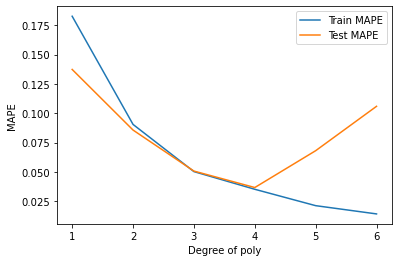

In [56]:
import matplotlib.pyplot as plt
plt.plot(range(1,7), train_mapelst[:6], label='Train MAPE')
plt.plot(range(1,7), test_mapelst[:6], label='Test MAPE')
plt.xlabel('Degree of poly')
plt.ylabel('MAPE')
plt.legend()
plt.show()

In [57]:
data = pd.read_csv('Advertising.csv')
df=pd.DataFrame(data = data)

x2 = df.drop('Sales', axis = 1)
y2 = df['Sales']

In [58]:
finalpins = PolynomialFeatures(degree = 3, include_bias=False)
finalpfea = finalpins.fit_transform(x2)

In [69]:
finalmodel=sm.OLS(y2, finalpfea).fit()
finalmodel.params

x1     1.261988e-01
x2     2.198370e-01
x3     1.234717e-01
x4    -5.697323e-04
x5     5.323155e-04
x6    -6.190489e-04
x7    -2.906033e-03
x8    -4.495668e-03
x9    -3.366549e-04
x10    9.252401e-07
x11    4.185316e-09
x12    1.071802e-06
x13    6.915197e-06
x14    5.332985e-06
x15    5.431213e-07
x16    7.495736e-06
x17    4.436494e-05
x18    1.302445e-05
x19   -1.302743e-06
dtype: float64

In [70]:
finalmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              5682.
Date:                Thu, 17 Feb 2022   Prob (F-statistic):                   3.04e-240
Time:                        21:13:51   Log-Likelihood:                         -185.56
No. Observations:                 200   AIC:                                      409.1
Df Residuals:                     181   BIC:                                      471.8
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1262      0.005     24.335      0.000       0.116       0.136
x2             0.2198      0.031      7.110      0.000       0.159       0.281
x3             0.1235      0.017      7.319      0.000       0.090       0.157
x4            -0.0006   4.16e-05    -13.708      0.000      -0.001      -0.000
x5             0.0005      0.000      2.786      0.006       0.000       0.001
x6            -0.0006      0.000     -4.899      0.000      -0.001      -0.000
x7            -0.0029      0.001     -1.993      0.048      -0.006   -2.84e-05
x8            -0.0045      0.001     -5.110      0.000      -0.006      -0.003
x9            -0.0003      0.000     -0.731      0.466      -0.001       0.001
x10         9.252e-07   9.45e-08      9.794      0.000    7.39e-07    1.11e-06
x11         4.185e-09   5.57e-07      0.008      0.994    -1.1e-06     1.1e-06
x12         1.072e-06   3.78e-07      2.835      0.005    3.26e-07    1.82e-06
x13         6.915e-06   3.17e-06      2.178      0.031    6.51e-07    1.32e-05
x14         5.333e-06   2.43e-06      2.198      0.029    5.45e-07    1.01e-05
x15         5.431e-07   9.59e-07      0.566      0.572   -1.35e-06    2.44e-06
x16         7.496e-06   2.13e-05      0.352      0.725   -3.45e-05    4.95e-05
x17         4.436e-05   1.35e-05      3.292      0.001    1.78e-05     7.1e-05
x18         1.302e-05   7.41e-06      1.758      0.080    -1.6e-06    2.76e-05
x19        -1.303e-06    2.6e-06     -0.501      0.617   -6.43e-06    3.82e-06
==============================================================================
Omnibus:                       36.870   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              363.238
Skew:                           0.102   Prob(JB):                     1.33e-79
Kurtosis:                       9.599   Cond. No.                     6.65e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.65e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### model prediction with new data

In [65]:
newdata=[[149, 22, 12]]

In [66]:
testpolyfea = finalpins.fit_transform(newdata)
result = finalmodel.predict(testpolyfea)
result

array([14.9141421])

### residual analysis

In [67]:
residuals=finalmodel.resid
residuals

0      1.117116
1     -0.432548
2      0.754175
3      0.065687
4     -0.194988
         ...   
195    1.572155
196    0.384720
197    0.286997
198   -0.411322
199    0.265808
Length: 200, dtype: float64

<Figure size 576x1152 with 0 Axes>

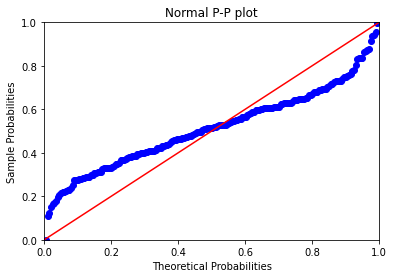

In [68]:
probplot=sm.ProbPlot(residuals)
plt.figure(figsize = (8,16))
probplot.ppplot(line='45')
plt.title('Normal P-P plot')
plt.show()

In [85]:
def standardize(vals):
    return(vals-vals.mean())/vals.std()

Text(0, 0.5, 'std residuals')

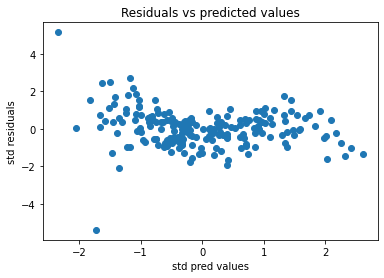

In [86]:
plt.scatter(standardize(finalmodel.fittedvalues), standardize(residuals))
plt.title('Residuals vs predicted values')
plt.xlabel('std pred values')
plt.ylabel('std residuals')

In [87]:
import seaborn as sns

<AxesSubplot:>

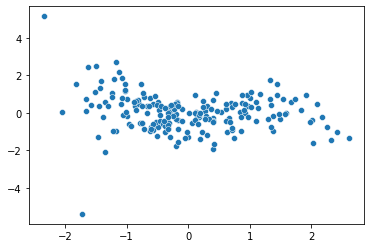

In [95]:
sns.scatterplot(x=standardize(finalmodel.fittedvalues), y=standardize(residuals))

The file salary_raw_data provides salary and educational qualifications of 30 randomly chosen people. Build a regression model to establish the relationship between salary earned and their educational qualifications. 
If we build a model Y = b0 + b1 × Education, it will be incorrect. We have to use dummy variables.
High School: 1
Graduate: 2
Post Graduate: 3
None: 4


In [71]:
S=pd.read_excel('Salary_dummy_raw_data.xlsx')
S

,Education,Salary
0,1,9800
1,1,10200
2,1,14200
3,1,21000
4,1,16500
5,1,19210
6,1,9700
7,1,11000
8,1,7800
9,1,8800


In [74]:
S['Education'] = S['Education'].apply(str)
S.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Education  30 non-null     object
 1   Salary     30 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 608.0+ bytes


In [75]:
S_dummies=pd.get_dummies(S['Education'])
S_dummies

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
5,1,0,0,0
6,1,0,0,0
7,1,0,0,0
8,1,0,0,0
9,1,0,0,0


In [76]:
S_dummies.drop('4', axis=1, inplace=True)
S_dummies

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


In [77]:
S = pd.concat([S_dummies, S['Salary']], axis=1)
S.head()

,1,2,3,Salary
0,1,0,0,9800
1,1,0,0,10200
2,1,0,0,14200
3,1,0,0,21000
4,1,0,0,16500


In [78]:
x3= sm.add_constant(S[['1','2','3']])
y3=S['Salary']

In [82]:
model5=sm.OLS(y3,x3).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     21.39
Date:                Thu, 17 Feb 2022   Prob (F-statistic):           3.41e-07
Time:                        21:45:57   Log-Likelihood:                -279.91
No. Observations:                  30   AIC:                             567.8
Df Residuals:                      26   BIC:                             573.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7383.3333   1196.395      6.171      0.000    4924.108    9842.558
1           5437.6667   1513.333      3.593      0.001    2326.966    8548.367
2           1.023e+04   1513.333      6.761      0.000    7120.966    1.33e+04
3           1.267e+04   1891.666      6.696      0.000    8778.291    1.66e+04
==============================================================================
Omnibus:                        9.027   Durbin-Watson:                   1.184
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                7.645
Skew:                           0.961   Prob(JB):                       0.0219
Kurtosis:                       4.557   Cond. No.                         5.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
# salary = 7383 + 5437 * HS(1) +10231 * 0 +12666 * 0